prova
• 25% anàlisis dels atributs (data mining),
• 25% aplicació de diversos mètodes d'aprenentatge,
• 30% visualització i presentació dels resultats,
• 10% repositori github
• 10% presentació opcional

# Cas Kaggle - F1 World Championship (1950 - 2024)
## Introducció
Aquesta base de dades conté informació sobre el campionat del món de F1 des de 1950 fins a 2024. Les dades estan organitzades en diferents arxius CSV dins de la carpeta `data`, cadascun proporciona informació específica sobre diferents aspectes del campionat. A continuació, es descriuen els arxius disponibles:

- `circuits.csv`: Informació sobre els circuits on s'han celebrat curses de F1.
- `constructor_results.csv`: Resultats de cada equip (constructor) en cada cursa.
- `constructor_standings.csv`: Classificació final de cada equip (constructor) al final de cada temporada.
- `constructors.csv`: Informació sobre els equips (constructors) que han participat en temporades de F1.
- `driver_standings.csv`: Classificació final de cada pilot al final de cada temporada.
- `drivers.csv`: Informació sobre els pilots que han participat en temporades de F1.
- `lap_times.csv`: Temps de cada volta de cada cursa.
- `pit_stops.csv`: Informació sobre les parades en 'pit' de cada cursa.
- `qualifying.csv`: Resultats de la sessió de classificació de cada cursa.
- `races.csv`: Informació sobre cada cursa, inclòs dates i ubicacions.
- `results.csv`: Resultats detallats de cada cursa.
- `seasons.csv`: Informació sobre cada temporada del campionat.
- `sprint_results.csv`: Resultats de les curses sprint.
- `status.csv`: Informació sobre l'estat dels pilots durant les curses. (per exemple, si han abandonat o han estat desqualificats).

## Objectius
1. **Anàlisis de rendiment dels pilots i equips**: Evaluar el rendiment dels pilots i equips al llarg dels anys. Identificar els pilots i equips més exitosos de la història de la F1.

2. **Anàlisis de circuits**: Analitzar el rendiment dels pilots i equips en diferents circuits. Identificar els circuits més desafiants i aquells on s'han produït més accidents.

3. **Tendències històriques**: Identificar tendencies i canvis en el campionat de F1 al llarg del temps. Analitzar l'evolució de la tecnologia i el seu impacte en el rendiment dels equips.

4. **Predicció de resultats**: Utilitzar tècniques d'aprenentatge automàtic per predir els resultats de curses futures. Identificar els factors clau que influeixen en el rendiment dels pilots i equips.

## 1. Anàlisis de rendiment dels pilots i equips

Mètode d'aprenentatge: Anàlisis de regressió per avaluar l'impacte de diferents variables al rendiment.

### 1.1 Carregar les dades
Utilitzar els arxius CSV disponibles a la carpeta `data` per carregar les dades necessàries per a l'anàlisis.

Arxius necessaris: `driver_standings.csv`, `constructos_standings.csv`, `results.csv`, `races.csv`, `drivers.csv`, `constructors.csv`.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

driver_standings = pd.read_csv('data/driver_standings.csv')
constructor_standings = pd.read_csv('data/constructor_standings.csv')
results = pd.read_csv('data/results.csv')
races = pd.read_csv('data/races.csv')
drivers = pd.read_csv('data/drivers.csv')
constructors = pd.read_csv('data/constructors.csv')

### 1.2 Preparar les dades
Unir les dades de diferents arxius per obtenir una taula única amb la informació necessària per a l'anàlisis.

In [15]:
merged_data = pd.merge(results, races, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
merged_data = pd.merge(merged_data, constructors, on='constructorId')

### 1.3 Anàlisis descrptiu
Calcular estadístiques descriptives com el nombre de punts, i posicions finals per a cada pilot i equip.

Visualitzar la distribució dels punts i posicions finals al llarg dels anys.

In [16]:
driver_performance = merged_data.groupby('driverId').agg({
    'points': 'sum',
    'positionOrder': 'mean',
}).reset_index()

constructor_performance = merged_data.groupby('constructorId').agg({
    'points': 'sum',
    'positionOrder': 'mean',
}).reset_index()

### 1.4 Anàlisis comparatiu
Comparar el rendiment dels pilots i equips en diferents temporades. 

Identificar els pilots i equips més exitosos en la història de la F1.

In [17]:
driver_performance = pd.merge(driver_performance, drivers[['driverId', 'surname']], on='driverId')

constructor_performance = pd.merge(constructor_performance, constructors[['constructorId', 'name']], on='constructorId')

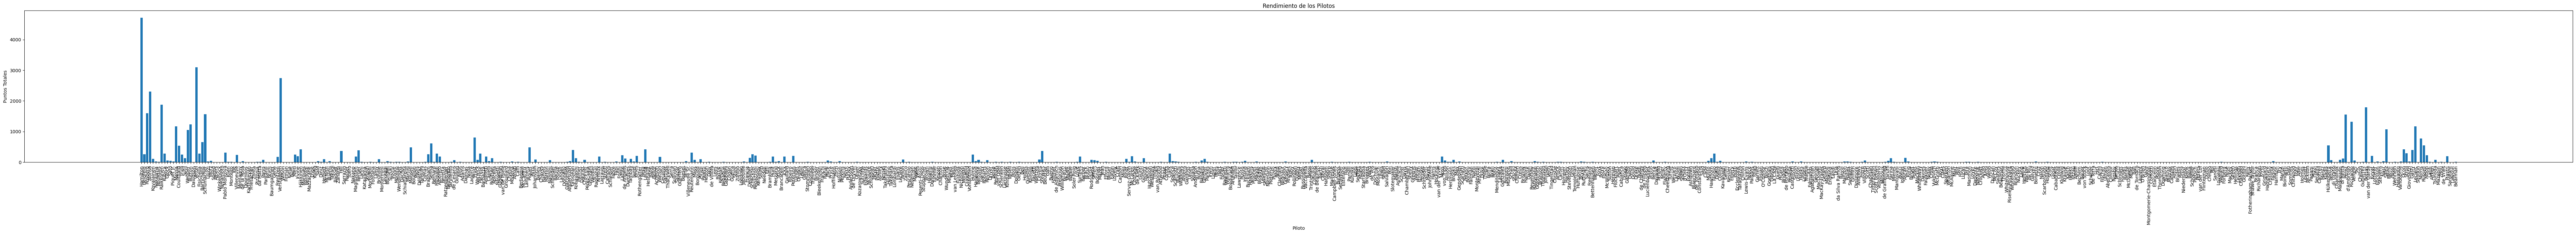

Top 10 pilots més exitosos: 
        surname  points
0      Hamilton  4713.5
19       Vettel  3098.0
828  Verstappen  2744.5
3        Alonso  2304.0
7     Räikkönen  1873.0
820      Bottas  1788.0
2       Rosberg  1594.5
29   Schumacher  1566.0
813       Pérez  1552.0
815   Ricciardo  1319.0


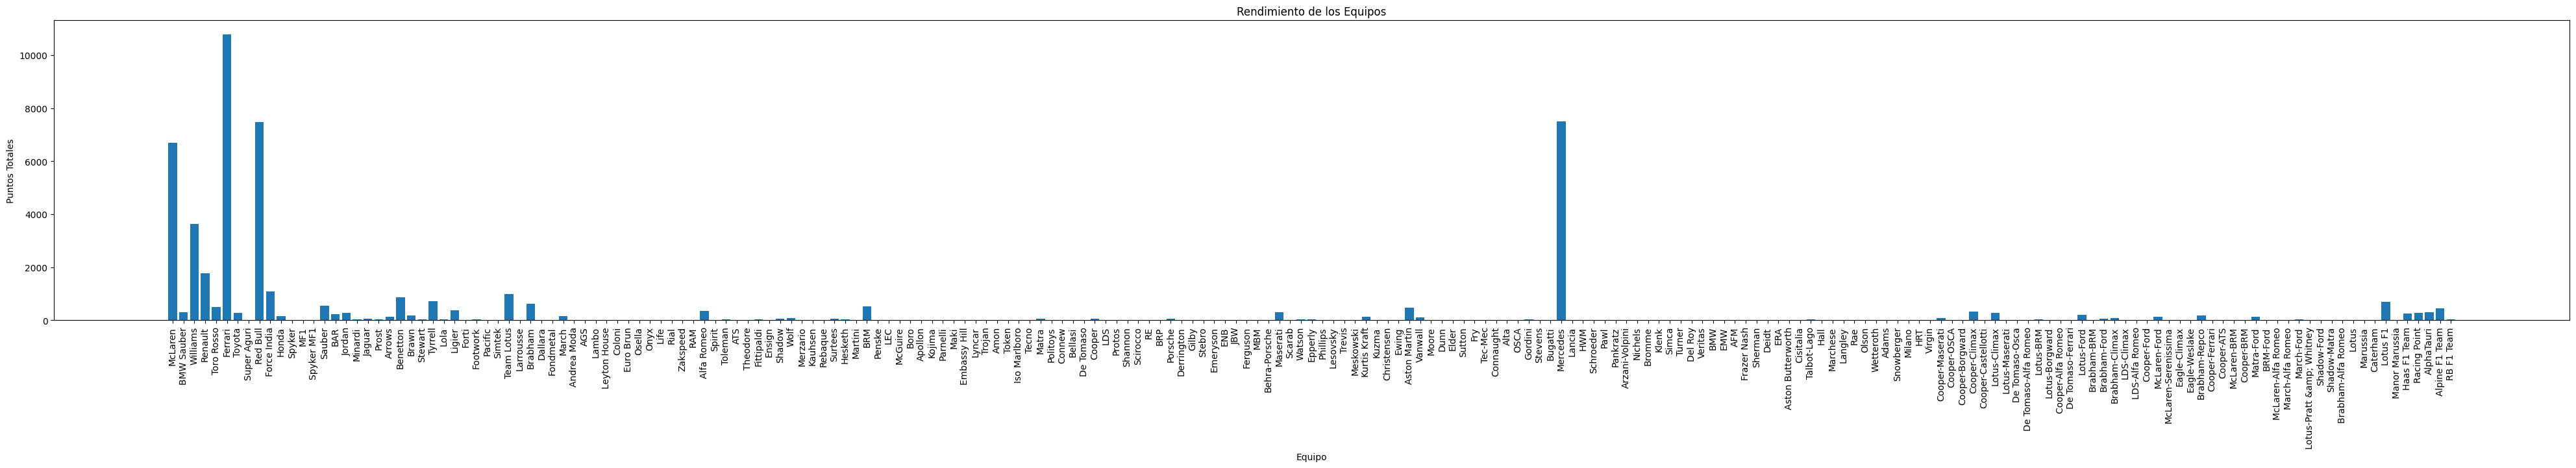

Top 10 equipos más exitosos: 
            name    points
5        Ferrari  10772.27
128     Mercedes   7502.64
8       Red Bull   7472.00
0        McLaren   6687.50
2       Williams   3628.00
3        Renault   1777.00
9    Force India   1098.00
31    Team Lotus    995.00
21      Benetton    861.50
24       Tyrrell    711.00


In [26]:
# Visualització del rendiment dels pilots
plt.figure(figsize=(100, 6))
plt.bar(driver_performance['surname'], driver_performance['points'])
plt.xlabel('Piloto')
plt.ylabel('Puntos Totales')
plt.title('Rendimiento de los Pilotos')
plt.xticks(rotation=90)
plt.show()

top_drivers = driver_performance.sort_values(by='points', ascending=False).head(10)
print("Top 10 pilots més exitosos: ")
print(top_drivers[['surname', 'points']])   

# Visualització del rendiment dels constructors
plt.figure(figsize=(50, 6))
plt.bar(constructor_performance['name'], constructor_performance['points'])
plt.xlabel('Equipo')
plt.ylabel('Puntos Totales')
plt.title('Rendimiento de los Equipos')
plt.xticks(rotation=90)
plt.show()

top_constructors = constructor_performance.sort_values(by='points', ascending=False).head(10)
print("Top 10 equipos más exitosos: ")
print(top_constructors[['name', 'points']])

### 1.5 Anàlisis de regressió
Realitzar una anàlisis de regressió per avaluar l'impacte de diferents variables en el rendiment dels pilots i equips.

Identificar les variables més significatives que influeixen en el rendiment.

Mean Squared Error: 22.959675362011577
Coefficient of Determination: 0.3182963742091691
               Coefficient
race_year     1.246870e-01
driver_age    2.922878e-02
grid         -6.127037e-01
laps          3.230519e-03
milliseconds  5.968199e-07


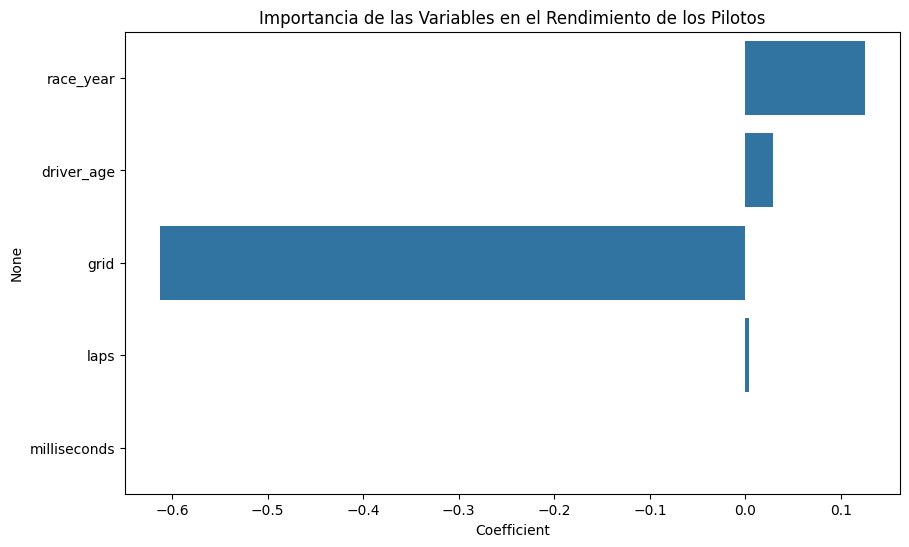

In [25]:
# Crear noves característiques
merged_data['race_year'] = merged_data['raceId'].map(races.set_index('raceId')['year'])
merged_data['driver_age'] = merged_data.apply(lambda row: row['race_year'] - int(drivers.set_index('driverId').loc[row['driverId'], 'dob'].split('-')[0]), axis=1)

# Eliminar files amb valors nuls
merged_data.replace('\\N', np.nan, inplace=True)
merged_data.dropna(subset=['grid', 'laps', 'milliseconds', 'points'], inplace=True)

# Conversió de les dades a numèriques
merged_data['grid'] = pd.to_numeric(merged_data['grid'])
merged_data['laps'] = pd.to_numeric(merged_data['laps'])
merged_data['milliseconds'] = pd.to_numeric(merged_data['milliseconds'])
merged_data['points'] = pd.to_numeric(merged_data['points'])

# Selecció de característiques
features = ['race_year', 'driver_age', 'grid', 'laps', 'milliseconds']
X = merged_data[features]
y = merged_data['points']

# Divisió de les dades en conjunt d'entrenament i de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creació del model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicció
y_pred = model.predict(X_test)

# Avaluació del model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination:', r2_score(y_test, y_pred))

# Importancia de les variables
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

# Visualització de la importancia de les variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y=coefficients.index, data=coefficients)
plt.title('Importancia de las Variables en el Rendimiento de los Pilotos')
plt.show()


### Conclusions

1. Els pilots i equips més exitosos de la història de la F1.
Fent l'anàlisis comparatiu hem identificat els pilots i equips més exitosos de la història de la F1 basant-nos en les seves posicions finals i punts totals.

2. Factors clau que influeixen en el rendiment.
A través de l'anàlisis de regressió hem identificat els factors clau que influeixen en el rendiment dels pilots i equips. Això pot ser útil per predir resultats futurs i millorar el rendiment.

El MSE és d'aproximadament 22.96. Això indica que, en mitjana, les prediccions del model tenen un error quadràtic mitjà de 22.96 punts. Un MSE més baix seria preferible, ja que indicaria un millor ajust del model a les dades.

El R² és d'aproximadament 0.318. Això significa que el model explica el 31.8% de la variabilitat en els punts obtinguts pels pilots. Un R² més pròxim a 1 indicaria un millor ajust del model. En aquest cas, un R² de 0.318 suggereix que hi ha altres factors importants que no estan sent capturats pel model.

- race_year (0.124687): L'any de la carrera té un coeficient positiu, la qual cosa suggereix que, en mitjana, els punts obtinguts pels pilots han augmentat lleugerament amb el temps.
- driver_age (0.029229): L'edat del pilot té un coeficient positiu petit, la qual cosa indica que l'edat del pilot té un impacte positiu molt lleu en els punts obtinguts.
- grid (-0.612704): La posició de sortida (grid) té un coeficient negatiu significatiu, la qual cosa suggereix que sortir des d'una posició més alta (més prop del front) està associat amb obtenir més punts. Aquest és una troballa esperada, ja que els pilots que comencen més endavant en la graella solen tenir un avantatge.
- laps (0.003231): El nombre de voltes completades té un coeficient positiu molt petit, la qual cosa indica que completar més voltes està lleugerament associat amb obtenir més punts.
- milliseconds (5.968199e-07): El temps en mil·lisegons té un coeficient positiu extremadament petit, la qual cosa suggereix que el seu impacte en els punts obtinguts és pràcticament insignificant.

## 2. Anàlisis de circuits

Mètode d'aprenentatge: Clusteing per agrupar circuits segons característiques similars i anàlisis de components principals (PCA) per reduir dimensionalitat de les dades.

## 3. Tendències històriques

Mètode d'aprenentatge: Series temporals per analitzar al llarg del temps i models de regressió per avaluar l'impacte de la tecnologia

## 4. Predicció de resultats

Mètodes d'aprenentatge: 
- Regressió logística per predir la probabilitat de que un pilot acabi en una posició específica.
- Arbres de decisió i Random Forest per identificar els factors més importants que influeixen en els resultats.
- Gradient boosting per optimitzar les prediccions.